In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import operator
from scipy.interpolate import interp1d
pd.options.mode.chained_assignment = None  # default='warn'


astro_data = "D:\\Tools\\VSC\\Code\\Data-Analysis-Pull\\Data-Analysis\\astrolab1.csv"

data_path = "D:\\Tools\\VSC\\Code\\Data-Analysis-Pull\\Data-Analysis\\lab-smh-a-dataset1.csv"

data_path2 = "D:\\Tools\\VSC\\Code\\Data-Analysis-Pull\\Data-Analysis\\lab-smh-a-dataset2.csv"

astrodata = pd.read_csv(astro_data)

data = pd.read_csv(data_path)

data2 = pd.read_csv(data_path2)

In [2]:
data2.describe()

,time,distance,force
count,314.000000,314.000000,314.000000
mean,4.695000,0.384076,-24.758599
std,2.723646,0.013877,1.673016
min,0.000000,0.363000,-27.200000
25%,2.347500,0.370000,-26.400000
50%,4.695000,0.384000,-24.800000
75%,7.042500,0.398000,-23.100000
max,9.390000,0.404000,-22.300000


In [3]:
astrodata.describe()

,alt,az,180-az,long
count,8.00000,8.000000,8.000000,8.000000
mean,23.62500,180.062500,-0.062500,-4.912500
std,2.10017,24.069004,24.069004,20.523536
min,20.00000,152.000000,-37.000000,-37.500000
25%,22.37500,163.875000,-16.750000,-18.750000
50%,23.75000,172.000000,8.000000,2.000000
75%,25.50000,196.750000,16.125000,8.500000
max,26.00000,217.000000,28.000000,19.200000


In [4]:
time = data['time']
distance = data['distance']
force = data['force']

time2 = data2['time']
distance2 = data2['distance']
force2 = data2['force']

alt = astrodata['alt']
az = astrodata['az']
long = astrodata['long']

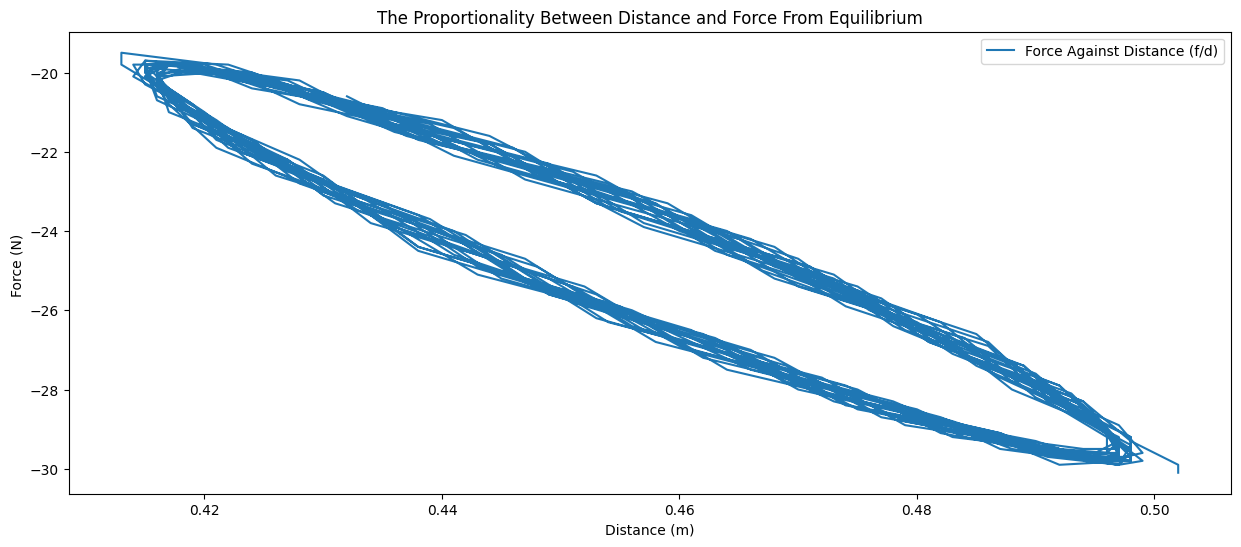

In [5]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot((distance), force, label = "Force Against Distance (f/d)")
ax.legend()

plt.xlabel("Distance (m)")
plt.ylabel("Force (N) ")
plt.title("The Proportionality Between Distance and Force From Equilibrium")

plt.savefig("forceagainstdistance.png")
plt.show()



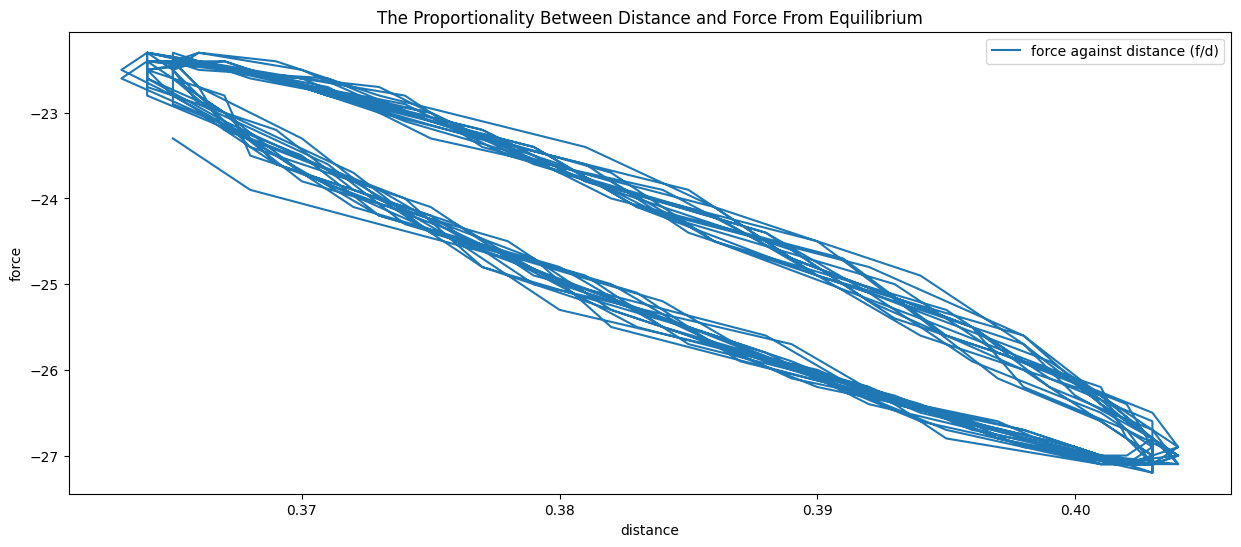

In [6]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot((distance2), force2, label = "force against distance (f/d)")
ax.legend()



plt.xlabel("distance")
plt.ylabel("force")
plt.title("The Proportionality Between Distance and Force From Equilibrium")


plt.show()

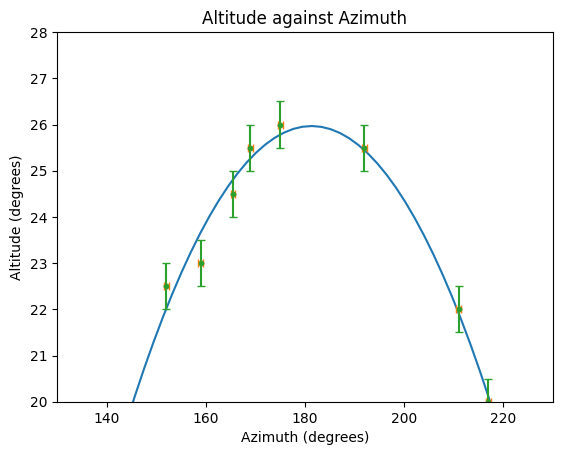

In [63]:
from matplotlib import markers


x = az
y = alt

#find line of best fit
a, b, c = np.polyfit(x, y, 2)

#add points to plot
plt.scatter(x, y, color='white')

plt.xlabel("Azimuth (degrees)")
plt.ylabel("Altitude (degrees)")

plt.title("Altitude against Azimuth")

#polynomial fit with degree = 2
model = np.poly1d(np.polyfit(x, y, 2))

#add fitted polynomial line to scatterplot
polyline = np.linspace(1, 375, 200)
plt.scatter(x, y,marker='.')
plt.plot(polyline, model(polyline))
plt.errorbar(x, y, xerr=0.5, fmt=".",capsize=3,)
plt.errorbar(x, y, yerr=0.5, fmt=".",capsize=3,)
plt.ylim(ymin=20)
plt.ylim(ymax=28)
plt.xlim(xmin=130)
plt.xlim(xmax=230)
plt.savefig("altvsaz.png")
plt.show()

In [13]:
print(model)
print(-0.004606*180**2+1.67*180-125.5) # finds alpha max

           2
-0.004606 x + 1.67 x - 125.5
25.865599999999972


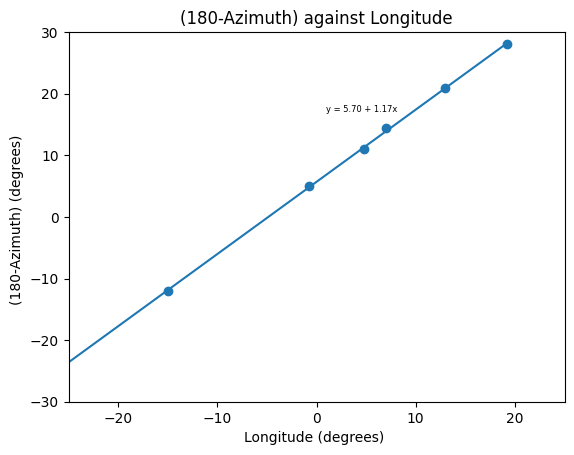

In [64]:
x = long
y = 180-az

#find line of best fit
a, b, c = np.polyfit(x, y, 2)

#add points to plot
plt.scatter(x, y, color='white')

plt.xlabel("Longitude (degrees) ")
plt.ylabel("(180-Azimuth) (degrees) ")

plt.title("(180-Azimuth) against Longitude")

#polynomial fit with degree = 2

plt.scatter(x, y)

a, b = np.polyfit(x, y, 1)

#add line of best fit to plot
plt.plot(x, a*x+b) 
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=6)
plt.ylim(ymin=-30)
plt.ylim(ymax=30)
plt.xlim(xmin=-25)
plt.xlim(xmax=25)
plt.savefig("180-azvslong.png")
plt.show()

In [10]:
print(-5.70/1.17) # finds longitude

-4.871794871794872


In [11]:
gradient = ((np.mean(distance2) * np.mean(force2)) - np.mean(distance2*force2))/((np.mean(distance2))**(2)-(np.mean(distance2**(2))))

gradient

-114.90152640100712